# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to check these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [4]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(pyber_data_df['type']).count()['ride_id']
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(city_data_df['type']).sum()['driver_count']
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(pyber_data_df['type']).sum()['fare']
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = total_fares / total_rides
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fares / total_drivers
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [9]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.concat([total_rides, total_drivers, total_fares, avg_fare_per_ride, avg_fare_per_driver], axis = 1)
pyber_summary_df.rename(columns = {'ride_id': 'Total Rides', 'driver_count': 'Total Drivers', 'fare': 'Total Fares', 0: 'Average Fare per Ride', 1: 'Average Fare per Driver'}, inplace = True)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  8. Format the columns.
format_dict = {
    'Total Rides': '{:,}', 
    'Total Drivers': '{:,}', 
    'Total Fares': '${:,.2f}', 
    'Average Fare per Ride':'${:,.2f}',
    'Average Fare per Driver': '${:,.2f}'
}
pyber_summary_df.head().style.format(format_dict)

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# Print the merged DataFrame for reference.
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [13]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fares_weekly = pyber_data_df.groupby(['date', 'type']).sum()[['fare']]
total_fares_weekly

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [14]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fares_weekly = total_fares_weekly.reset_index()
total_fares_weekly

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [15]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fares_weekly_pivot = total_fares_weekly.pivot(index = 'date', columns = 'type', values = 'fare')
total_fares_weekly_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [16]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.


In [17]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
total_fares_weekly_pivot.index = pd.to_datetime(total_fares_weekly_pivot.index)

In [18]:
# 6. Check that the datatype for the index is datetime using df.info()
total_fares_weekly_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [19]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
total_fares_w = total_fares_weekly_pivot.resample('W').sum()
total_fares_w.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-14,269.79,784.82,2390.72
2019-04-21,214.14,1149.27,2303.80
2019-04-28,191.85,1357.75,2238.29
2019-05-05,257.42,1164.78,2178.57
2019-05-12,156.82,308.21,610.03


In [20]:
total_fares_w_filtered = total_fares_w.query("date >= '2019-01-01' and date <'2019-04-28'")
total_fares_w_filtered.tail()

type,Rural,Suburban,Urban
date,,,
2019-03-24,189.76,1122.20,2368.37
2019-03-31,199.42,1045.06,1942.77
2019-04-07,501.24,1010.73,2356.70
2019-04-14,269.79,784.82,2390.72
2019-04-21,214.14,1149.27,2303.80


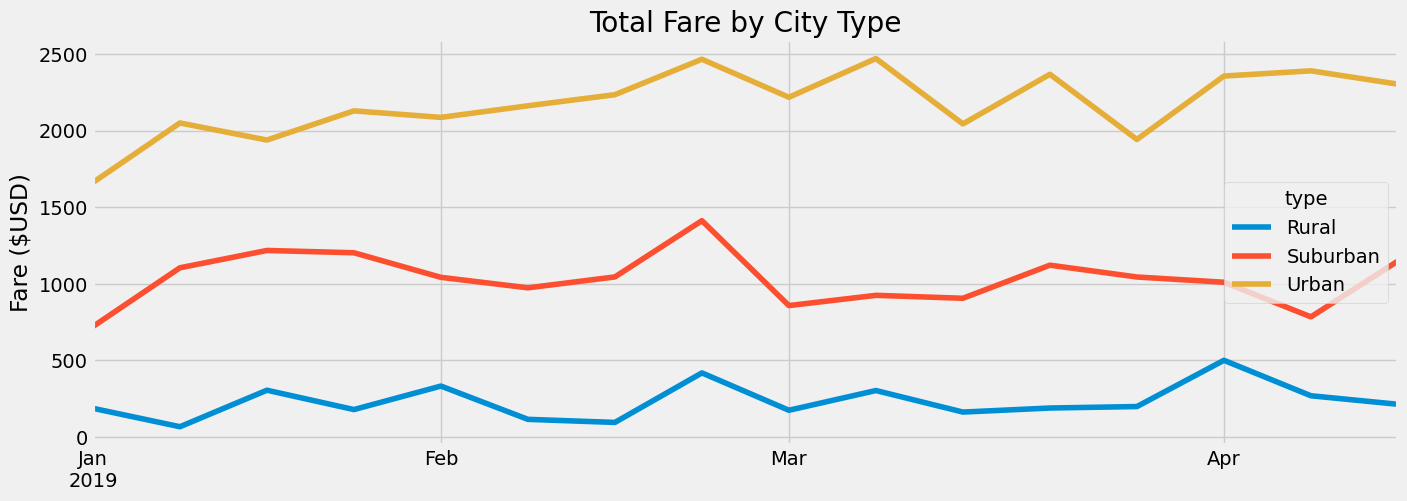

In [25]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

total_fares_chart = total_fares_w_filtered.plot(figsize = (15, 5))
total_fares_chart.set_xlabel("")
total_fares_chart.set_ylabel("Fare ($USD)")
total_fares_chart.set_title("Total Fare by City Type")
plt.savefig("Analysis/PyBer_fare_summary.png")

